# Вычисление числа π методом Монте-Карло

## Метод Монте-Карло
Метод Монте-Карло — это численный метод, который использует случайные числа для решения задач. В данном случае мы будем использовать его для вычисления числа π.

## Импорт

In [ ]:
import random
import matplotlib.pyplot as plt

In [4]:
# Установка зависимостей
!pip install matplotlib numpy ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.5 MB/s eta 0:00:00


## Инициализация количества точек

In [5]:
num_points = 10000 # точки

## Броски дротиков

In [6]:
hits = 0
points = []

for _ in range(num_points):
    x = random.random()  #0-1
    y = random.random()  #0-1
    if x**2 + y**2 <= 1:  # проверка: точка в кругу?
        hits += 1
        points.append((x, y, True))  # точка внутри круга
    else:
        points.append((x, y, False))  # точка вне круга

## Построение графика

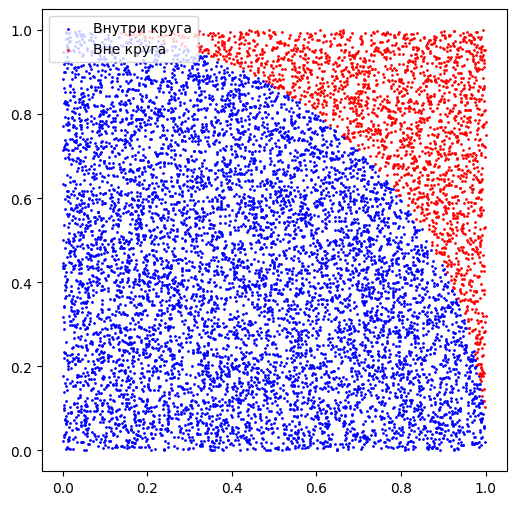

In [7]:
x_inside = [p[0] for p in points if p[2]]
y_inside = [p[1] for p in points if p[2]]
x_outside = [p[0] for p in points if not p[2]]
y_outside = [p[1] for p in points if not p[2]]

plt.figure(figsize=(6, 6))
plt.scatter(x_inside, y_inside, color="blue", s=1, label="Внутри круга")
plt.scatter(x_outside, y_outside, color="red", s=1, label="Вне круга")
plt.legend()
plt.show()

## Вычисление числа π

In [8]:
pi_estimate = 4 * hits / num_points
print(f"Оценка числа π: {pi_estimate}")

Оценка числа π: 3.152


## Интерактивные элементы (виджеты)

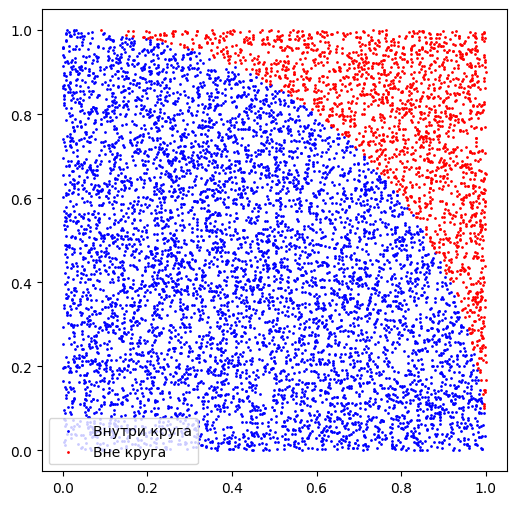

Оценка числа π: 3.125238095238095


In [10]:

import random
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

# Функция для генерации точек
def throw_darts(num_points):
    hits = 0
    points = []

    for _ in range(num_points):
        x = random.random()  # Случайное число от 0 до 1
        y = random.random()  # Случайное число от 0 до 1
        if x**2 + y**2 <= 1:  # Проверка, попадает ли точка в круг
            hits += 1
            points.append((x, y, True))  # Точка внутри круга
        else:
            points.append((x, y, False))  # Точка вне круга

    # Вычисление доли попаданий
    fraction = hits / num_points
    pi = 4 * fraction
    return pi, points

# Функция для визуализации
def create_plot(points):
    x_inside = [p[0] for p in points if p[2]]
    y_inside = [p[1] for p in points if p[2]]
    x_outside = [p[0] for p in points if not p[2]]
    y_outside = [p[1] for p in points if not p[2]]

    plt.figure(figsize=(6, 6))
    plt.scatter(x_inside, y_inside, color="blue", s=1, label="Внутри круга")
    plt.scatter(x_outside, y_outside, color="red", s=1, label="Вне круга")
    plt.legend()
    plt.show()

# Функция для интерактивного эксперимента
def experiment(num_points):
    pi, points = throw_darts(num_points)
    create_plot(points)
    print("Оценка числа π:", pi)

# Создание слайдера
interact(experiment, num_points=widgets.IntSlider(min=100, max=10000, step=100, value=1000))

## Профилирование кода

In [14]:
# Установка line_profiler
!pip install line_profiler

# Загрузка расширения
%load_ext line_profiler

# Определение функций
import random

def step():
    """Возвращает случайное значение: 1 или -1."""
    return 1.0 if random.random() > 0.5 else -1.0

def walk(n):
    """Моделирует случайное блуждание."""
    x = [0.0] * n  # Начальная позиция
    dx = 1.0 / n   # Шаг

    for i in range(1, n):
        x_new = x[i - 1] + dx * step()
        if x_new > 5e-3:
            x[i] = 0.0
        else:
            x[i] = x_new

    return x

# Профилирование функции walk
%lprun -f walk walk(10000)

# Профилирование функции step
%lprun -f step walk(10000)

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler
